In [1]:
#pip install suds-jurko
# replace the followings
# "from urllib2 import HTTPSHandler" 
# "import urllib2.HTTPSHandler as HTTPSHandler"
# to 
# import urllib.request as urllib2
# HTTPSHandler=urllib2.HTTPSHandler


In [2]:
from suds.client import Client
from suds.transport.https import HttpAuthenticated
import urllib.request as urllib2
HTTPSHandler=urllib2.HTTPSHandler
import ssl
import pandas as pd
#import access
import os
from daq import readalc
from matplotlib.pyplot import *
%matplotlib inline

## MPC HVAC model : $$( \underbrace{Q_{BL},T_{R},T_{wb}}_{w},\underbrace{SP_{mCH},SP_{TCHe},SP_{TCTe}}_{u}) \rightarrow \underbrace{[T_{S,H},T_{S,C}]^T}_{x} \rightarrow P_{HVAC} $$


06/19/2020 05:41:40 PM	daq.daq.readalc     CRITICAL	Collecting #chiller_control_0208/cmmn_chws...


['#chiller_control_0208/cmmn_chws', '#chiller_control_0208/cmmn_chwr', '#chiller_control_0208/pchwr_temp', '#chiller_1_with_trends/m106', '#chiller_2_with_trends/m070']
6/15/2019 12:00:00 AM 6/18/2019 12:59:00 AM


06/19/2020 05:41:40 PM	daq.daq.readalc     CRITICAL	Collecting #chiller_control_0208/cmmn_chwr...


6/15/2019 12:00:00 AM 6/18/2019 12:59:00 AM


06/19/2020 05:41:41 PM	daq.daq.readalc     CRITICAL	Collecting #chiller_control_0208/pchwr_temp...


6/15/2019 12:00:00 AM 6/18/2019 12:59:00 AM


06/19/2020 05:41:41 PM	daq.daq.readalc     CRITICAL	Collecting #chiller_1_with_trends/m106...


6/15/2019 12:00:00 AM 6/18/2019 12:59:00 AM


06/19/2020 05:41:41 PM	daq.daq.readalc     CRITICAL	Collecting #chiller_2_with_trends/m070...


6/15/2019 12:00:00 AM 6/18/2019 12:59:00 AM


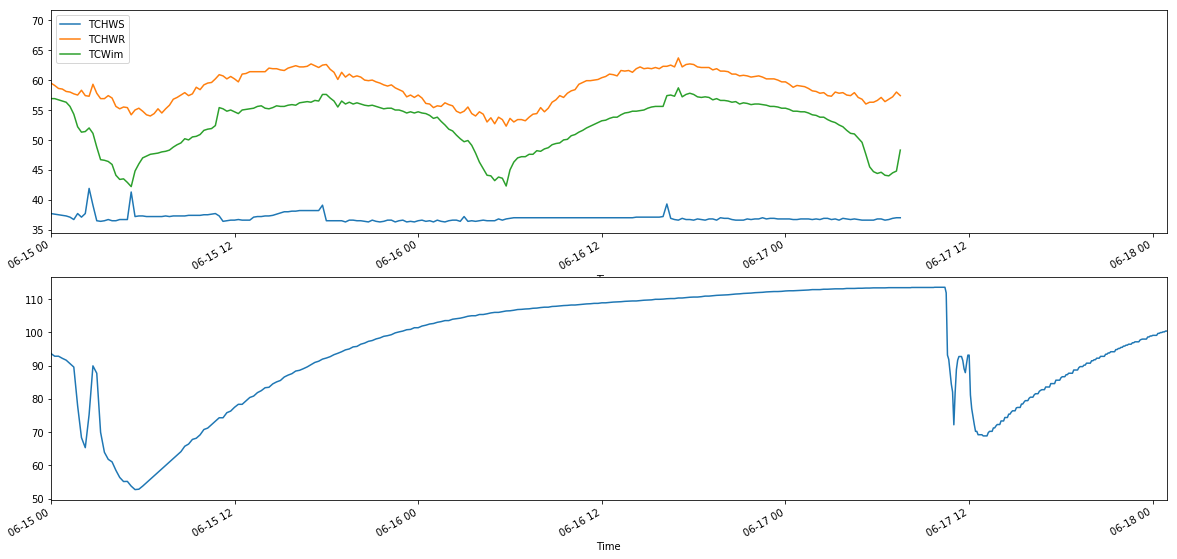

In [31]:
trend_paths=['#chiller_control_0208/cmmn_chws',#0
            '#chiller_control_0208/cmmn_chwr', #1
             '#chiller_control_0208/pchwr_temp', #2
             '#chiller_1_with_trends/m106',# chiller 1 with trends / MOTOR KW
             '#chiller_2_with_trends/m070']#Chiller 2 with trends / mtrw
#              '#chiller_control_0208/pchws_flw'] #3
#              '#chiller_control_0208/pchws_flw_tnk'] #4
             
#              '#chiller_control_0208/m533', # 5 Chiller Control 1,2&3 / Primary gpm Stpnt
#              '#chiller_plant_perform_0208/ani_4', #6 Total Plant Performance /CH-1 Etg Temp
#              '#chiller_plant_perform_0208/ani_5', #7 Total Plant Performance / CH-1 Lvg Temp
#              '#chiller_plant_perform_0208/ani_3', #8 Total Plant Performance / CH-1 Power kW
#              '#chiller_plant_perform_0208/ani_1', #9 Total Plant Performance / PCHW Flow
#              '#chiller_plant_perform_0208/ani_25', #10 Total Plant Performance / SCHW Flow
#              '#chiller_plant_perform_0208/ani_26', #11 Total Plant Performance / SCHWR Temp
#              '#chiller_plant_perform_0208/ani_27'] #12 Total Plant Performance / SCHWS Temp
column_names=['TCHWS', #0 
              'TCHWR', #1
              'TCWim', #2
              'P1',
              'mt?']
#              'mCHLgpm'] #3
#              'mSgpm'] #4
#               'SPmCHLgpm', #5
#               'TCHi1', #6 Total Plant Performance /CH-1 Etg Temp
#               'TCHe1', #7 Total Plant Performance / CH-1 Lvg Temp
#              'PCH1', #8 Total Plant Performance / CH-1 Power kW
#              'mCHLgpm_', #9 Total Plant Performance / PCHW Flow
#              'mRgpm', #10 Total Plant Performance / SCHW Flow
#              'TCHWR_', #11 Total Plant Performance / SCHWR Temp
#              'TCHWS_'] #12 Total Plant Performance / SCHWS Tempnt Performance / SCHWS Temp
              

start_time_local='6/15/2019 12:00:00 AM'
final_time_local='6/18/2019 12:59:00 AM'

client=readalc._connect()
response=readalc.collect_data(trend_paths, start_time_local, final_time_local,column_names)


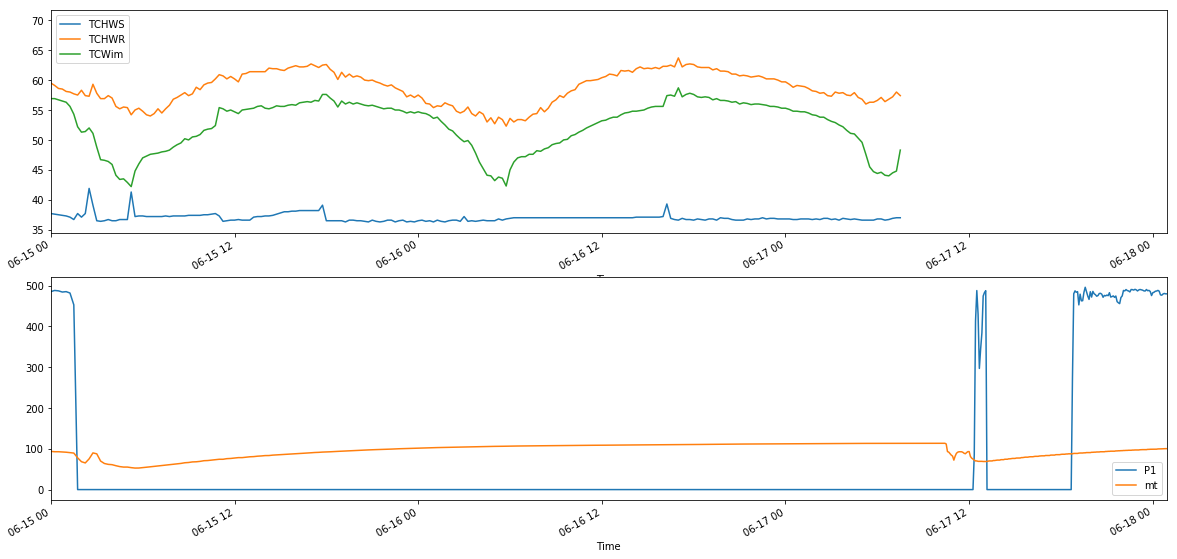

In [32]:
figure(figsize=(20,10))
ax=subplot(211)
response.iloc[:,0:3].plot(ax=ax)
ax=subplot(212)
response.iloc[:,3:].plot(ax=ax)

In [21]:
response.head()

,TCHWS,TCHWR,TCWim,mSgpm,SPmCHLgpm,TCHi1,TCHe1,PCH1,mCHLgpm_,mRgpm,TCHWR_
Time,,,,,,,,,,,
2019-06-15 00:00:00,37.7,59.5,56.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-15 00:15:00,37.6,59.1,56.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-15 00:30:00,37.5,58.6,56.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-15 00:45:00,37.4,58.5,56.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-15 01:00:00,37.3,58.1,56.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
